<img src="JI.png" width="190" height="60">
<center>
    <b>Seminario</b><br>
    <b>Author:  Juan Isaula</b>
<br><br>
<b>Resultados Preliminares:</b>
<h1>Prophet vs Neural Prophet</h1>
</center>
<i>Creado:     2022-Enero-31

<center>
PROPHET
<center>

Cargamos el set de datos (indice S&P 500 - mensual), y cambiamos el titulo de las variables columnas segun las necesidades de Prophet. 

In [1]:
import pandas as pd

# Cargamos los datos 
df = pd.read_csv('Data_P.csv')

# Creamos la serie temporal
df.Fecha = pd.to_datetime(df.Fecha)
df.set_index('Fecha',inplace=True)

# Crear series temporales legibles por fbprophet
ts = pd.DataFrame({'ds':df.index,'y':df.Precio})
ts

,ds,y
Fecha,,
2015-01-01,2015-01-01,1994.99
2015-02-01,2015-02-01,2104.50
2015-03-01,2015-03-01,2067.89
2015-04-01,2015-04-01,2085.51
2015-05-01,2015-05-01,2107.39
...,...,...
2021-08-01,2021-08-01,4522.68
2021-09-01,2021-09-01,4307.54
2021-10-01,2021-10-01,4605.38


Comenzaremos ejecutando un modelo básico de prophet 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


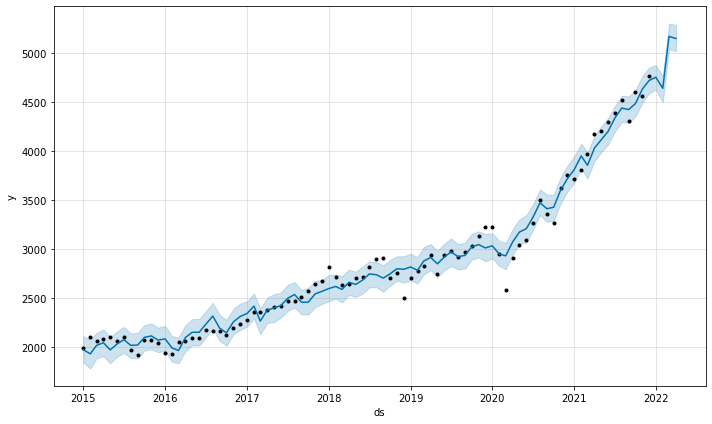

In [2]:
# Ejecute un modelo basico de fbprophet
from fbprophet import Prophet

#  Instanciar el modelo y ajustar las series temporales
prophet = Prophet()
prophet.fit(ts)

# Crear un marco de datos futuro
future = prophet.make_future_dataframe(periods=4,freq='M')
forecast = prophet.predict(future)

# Mostrar las columnas de salida más críticas del pronóstico
forecast[['ds','yhat','yhat_lower','yhat_upper']]

# Plot
fig = prophet.plot(forecast)

In [3]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,1976.827757,1846.750273,2116.133708
1,2015-02-01,1934.460182,1784.544575,2080.438762
2,2015-03-01,2020.732104,1887.587301,2148.053247
3,2015-04-01,2047.633606,1912.299624,2182.602806
4,2015-05-01,1974.912142,1837.716298,2107.158411
...,...,...,...,...
83,2021-12-01,4722.600489,4593.328061,4854.636500
84,2021-12-31,4756.058394,4630.974749,4879.536628
85,2022-01-31,4643.472558,4502.922948,4768.035934
86,2022-02-28,5172.474503,5044.130554,5302.701663


Arreglamos algunos de los problemas clave que tiene nuestro modelo anterior. 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


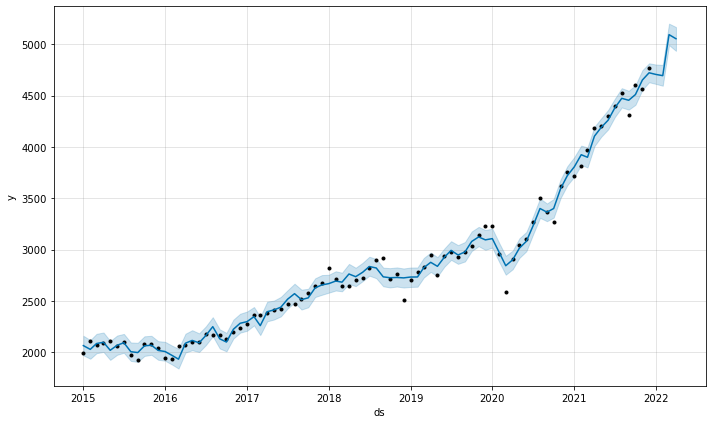

In [4]:
# Instanciar el modelo y ajustar las series temporales
prophet = Prophet(weekly_seasonality=False,changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(ts)

# crear un marco de datos futuro
future = prophet.make_future_dataframe(periods=4,freq='M')
forecast = prophet.predict(future)

# Mostrar las columnas de salida más críticas del pronóstico
forecast[['ds','yhat','yhat_lower','yhat_upper']]

#plot
fig = prophet.plot(forecast)

Cargamos los pronósticos en excel con extensión .csv

In [7]:
f1=forecast.yhat.values

excel  = pd.DataFrame({'Pronostico':f1})

excel.to_csv('Prophet_Mensual_Forcast.csv')

<center>
NeuralProphet
<center>

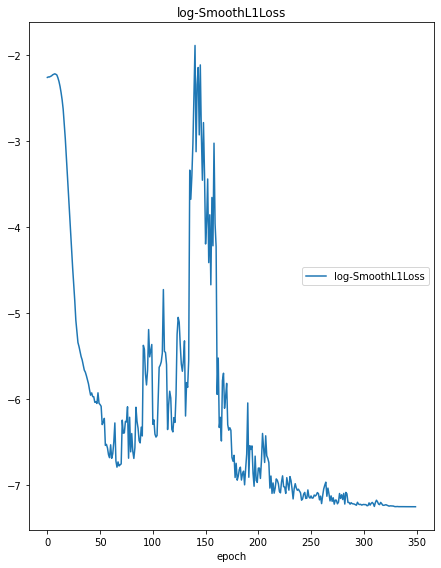

Epoch[350/350]: 100%|██████████| 350/350 [00:17<00:00, 20.02it/s, SmoothL1Loss=0.00071, MAE=68, RMSE=91.6, RegLoss=0]


In [8]:
from neuralprophet import NeuralProphet

data = pd.read_csv('Data_P.csv')
data.head()

prcp_data = data.rename(columns={'Fecha':'ds','Precio':'y'})[['ds','y']]
model = NeuralProphet(seasonality_mode='multiplicative')
metrics = model.fit(prcp_data,freq='M',plot_live_loss=True,epochs=350)

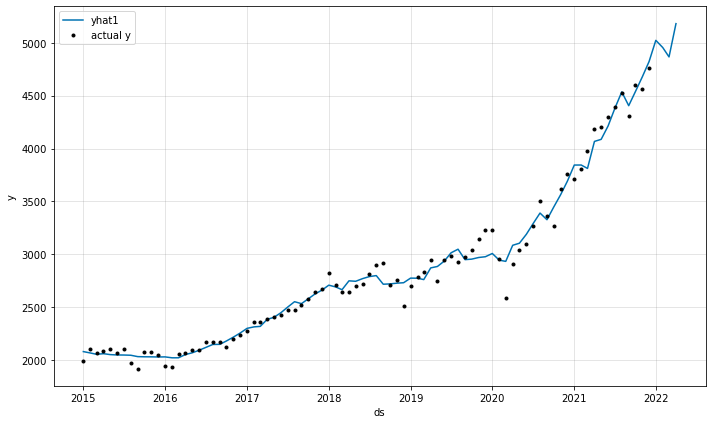

In [9]:
future = model.make_future_dataframe(prcp_data,periods=4,n_historic_predictions=len(prcp_data))
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

Cargamos el pronostico y datos reales a excel, con extension .csv

In [10]:
prcp_data_r = forecast.yhat1
pcrp_data_p = forecast.y

np_men = pd.DataFrame({'valor_real':pcrp_data_p,'valor_pronostico_NP':prcp_data_r})

np_men.to_csv('neural_prophet_mensuales.csv')